# Selection of statistical R-functions

* Author: Johannes Maucher, some modifications by OK in 2019
* Last Update: 2017-09-26


In [1]:
#load tidyverse
library(tidyverse)

#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

# Keep in mind: in package reshape and gbm overload functions
rename <- dplyr::rename
select <- dplyr::select

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Functions for generating data

|       function       |                                           comment                                           |
|:--------------------:|:-------------------------------------------------------------------------------------------:|
| runif(n, min=0, max=1) | Generate 'n' uniformly distributed random float numbers in the range between 'min' and 'max'      |
| rnorm(n, mean=0, sd=1) | Generate 'n' Gaussian distributed random numbers with mean 'mean' and standard deviation 'sd' |

In [2]:
runif(8)
runif(n=5, min=0, max=10)

[1] 0.51387657 0.34910539 0.50774231 0.18062082 0.02548706 0.97505646 0.63717505
[8] 0.40646314

[1] 1.5072406 0.3905843 4.1565967 9.3561112 7.0353731

Generate random rounded numbers

In [3]:
unif <- runif(5,0,10)
unif

trunc(unif)     #Cut the decimal digits of x
floor(unif)     #Returns the smallest integers not less than x 
ceiling(unif)   #Returns the largest integers not greater than x 
round(unif, 2)  #Round x with 2 decimal digits  

[1] 4.5656260 6.3323759 5.5241608 0.5722177 2.4440858

[1] 4 6 5 0 2

[1] 4 6 5 0 2

[1] 5 7 6 1 3

[1] 4.57 6.33 5.52 0.57 2.44

Setting the seed of a random number generator in order to obtain same random numbers:

In [4]:
set.seed(777)
runif(8)

set.seed(777)
runif(8)

[1] 0.68785741 0.49219261 0.34511557 0.99504991 0.69526717 0.01070004 0.34501585
[8] 0.17204948

[1] 0.68785741 0.49219261 0.34511557 0.99504991 0.69526717 0.01070004 0.34501585
[8] 0.17204948

## Statistical Functions

|             function            |                                    comment                                    |
|:-------------------------------:|:-----------------------------------------------------------------------------:|
| mean(x)                         | Mean value of x                                                               |
| median(x)                       | Median value of x                                                             |
| sd(x)                           | Standard deviation of x                                                       |
| var(x)                          | Variance of x                                                                 |
| mad(x)                          | Median absolute deviation of x                                                |
| quantile(x, probs)              | Quantiles of x; Probs is a numeric vector with probabilities in [0, 1]         |
| range(x)                        | Value range of x; returns sequence with lowest and highest value              |
| sum(x)                          | Sum of x                                                                      |
| diff(x, lag=n)                  | Difference of values in x; default lag is n=1                                 |
| min(x)                          | Minimum of x                                                                  |
| max(x)                          | Maximum of x                                                                  |
| scale(x, center=TRUE, scale=TRUE) | Standardization of x, optionally to mean=0 and/or to standard deviation of 1  |
| factorial(x)                    | x!                                                                  |



### Statistical summary
The standard `summary()`-function already provides a list of descriptive statistics for all columns of a dataframe. As can be seen in the example above, the statistics calculated by `summary()` are:
* for numeric variables: min, max, mean and the quartiles
* for factor variables: a table of frequencies for all values of the variable


In [5]:
#We use our previous Facebook data
facebookData <- read.csv(file="../data/facebook-ad-campaign.csv", header=TRUE,
                         sep=",", dec=".")

#Cleaning
facebookData <- facebookData %>% drop_na() %>% select(-X) %>% filter(spent < 100, spent > 0)

#glimpse(facebookData)

summary(facebookData)




     ad_id           reporting_start    reporting_end  campaign_id  
 Min.   : 708746   23/08/2017: 62    23/08/2017: 62   Min.   : 916  
 1st Qu.: 776335   21/08/2017: 55    21/08/2017: 55   1st Qu.: 936  
 Median : 781304   22/08/2017: 55    22/08/2017: 55   Median : 936  
 Mean   : 905516   19/08/2017: 46    19/08/2017: 46   Mean   :1023  
 3rd Qu.:1121249   20/08/2017: 43    20/08/2017: 43   3rd Qu.:1178  
 Max.   :1121585   18/08/2017: 41    18/08/2017: 41   Max.   :1178  
                   (Other)   :204    (Other)   :204                 
 fb_campaign_id      age      gender    interest1       interest2    
 Min.   :103916   30-34:191   F:189   Min.   : 2.00   Min.   : 3.00  
 1st Qu.:115487   35-39:131   M:317   1st Qu.:16.00   1st Qu.:19.00  
 Median :116363   40-44:103           Median :22.00   Median :26.00  
 Mean   :125091   45-49: 81           Mean   :25.72   Mean   :29.19  
 3rd Qu.:144564                       3rd Qu.:29.00   3rd Qu.:32.00  
 Max.   :144621             

## Probability distribution
R provides functions for many probability distributions. For example the name `norm` refers to a normal distribution. By applying different characters as prefix to the distribution name, different functions concerning this distribution can be applied:


* Prefix `d`, followed by name of the distribution yields the corresponding **probability density distribution (PDF)**. E.g. `dnorm(x, m, sd)` returns the probability density of a normal distribution with mean `m` and standard deviation `sd`.
* Prefix `p`, followed by name of the distribution yields the corresponding **probability distribution (= cumulative distribution function (CDF))**. E.g. `pnorm(x, m, sd)` returns the probability that the value of a normal-distributed variable with mean `m` and standard deviation `sd` is smaller than `x`.
* Prefix `q`, followed by name of the distribution yields the corresponding **quantile function**. E.g. `qnorm(q, m, sd)` returns the q-quantile of a normal-distributed variable with mean `m` and standard deviation `sd`.
* Prefix `r`, followed by name of the distribution **generates random samples** according to the given probability distribution. E.g. `rnorm(n, m, sd)` generates n random samples of a normal distribution with mean `m` and standard deviation `sd`.


This family of functions is demonstrated in the following subsections for the case of a normal distribution. Other probability density functions, which can be applied in the same way are, e.g. 

|  	|    |
|:--------------------:	|:-----------------:|
| Beta (beta)        	| Lognormal (lnorm)      	|
| Binomial (binom)       	|   Logistic (logis)     	|
| Cauchy (cauchy)        	| Multinomial (multinom)       	|   	
| Chi-squared (chisq)        	|   Normal (norm)     	|   	
| Exponential (exp)        	|  Poission (pois)      	|   	
| F (f)        	|  T (t)      	|   	
| Gamma (gamma)        	|  Uniform (unif)      	|   	
| Geometric (geom)        	| Weibull (weibull)      	|   	

The name in brackets is the abbreviation of the corresponding distribution in R.

We often use a particular distribution in conjunction with a statistical test, for example to check the dependency on 2 or more variables or to check if a result is just random, etc.

We don't go into this topic in depth, but some useful links will help you make the right decisions for statistical testing and distribution:

* [Vorgehen bei Hypothesentests](https://www.crashkurs-statistik.de/vorgehen-bei-hypothesentests/)
* [Welchen statistischen Test soll ich nehmen](https://www.crashkurs-statistik.de/welchen-statistischen-test-soll-ich-waehlen/)
* Flow charts for decision making to a statistical test: [FlowChart1](https://www.researchgate.net/profile/Martin_Jakob2/post/What_Statistical_test_should_I_use/attachment/59d63e0dc49f478072ea8d9b/AS%3A273765781442561%401442282256222/download/df572-distributions.jpg) and [FlowChart2](https://www.researchgate.net/profile/Martin_Jakob2/post/What_Statistical_test_should_I_use/attachment/59d63e0dc49f478072ea8d9c/AS%3A273765781442574%401442282257641/download/statistical_tests.jpg)
* Explaining videos like [BM17]

### Probability density function (PDF)

In [6]:
mean <- 3
std <- 0.5

x <- seq(1, 6, 0.1)
#print(x)

y <- dnorm(x, mean, std)   #PDF
#y <- pnorm(x, mean, std)   #CDF


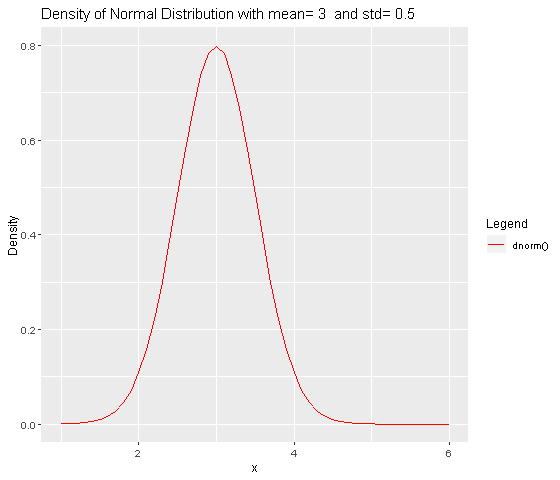

In [7]:
ggplot()+
    #geom_point(mapping=aes(x=x, y=y, color="col1")) +   #draw points
    geom_line(mapping=aes(x=x, y=y, color="col1")) +     #draw line
    labs(title=paste("Density of Normal Distribution with mean=",mean," and std=",std), 
         x="x", y="Density") +
    scale_color_manual(name = "Legend", 
                     labels = c("dnorm()"), 
                     values = c("col1"="red"))

#alternative Base R graphics
#plot(x, y, type="l", xlab="x", ylab="Density", yaxs="i")
#title(paste("Density of Normal Distribution with mean=", mean, " and std=", std))


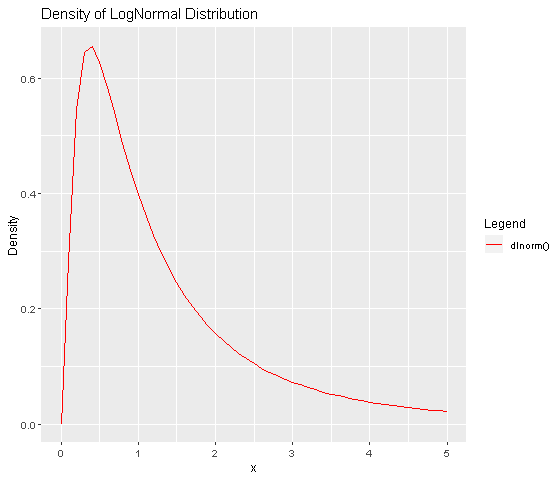

In [8]:
x <- pretty(c(0, 5), 60)
#print(x)

y <- dlnorm(x = x)

ggplot()+
    geom_line(mapping=aes(x=x, y=y, color="col1")) +     #draw line
    labs(title="Density of LogNormal Distribution", 
         x="x", y="Density") +
    scale_color_manual(name = "Legend", 
                     labels = c("dlnorm()"), 
                     values = c("col1"="red"))

#alternative Base R graphics
#plot(x, y, type="l", xlab="x", ylab="Density", yaxs="i")
#title("Density of LogNormal Distribution")


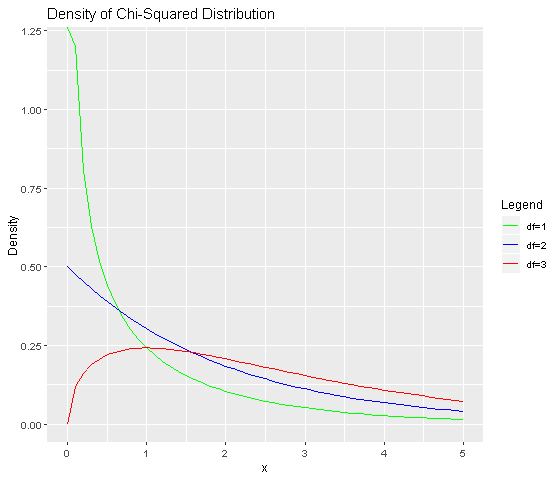

In [9]:
y1 <- dchisq(x = x, df=1)
y2 <- dchisq(x = x, df=2)
y3 <- dchisq(x = x, df=3)

ggplot()+
    geom_line(mapping=aes(x=x, y=y1, color="col1")) + 
    geom_line(mapping=aes(x=x, y=y2, color="col2")) + 
    geom_line(mapping=aes(x=x, y=y3, color="col3")) + 
    labs(title="Density of Chi-Squared Distribution", 
         x="x", y="Density") +
    scale_color_manual(name = "Legend", 
                     labels = c('df=1', 'df=2', 'df=3'), 
                     values = c("col1"="green", "col2"="blue", "col3"="red"))

#alternative Base R graphics
#plot(x, y1, type="l", xlab="x", ylab="Density", yaxs="i", col="red", lty=1)
#lines(x, y2, type="l", col="blue", lty=1)
#lines(x, y3, type="l", col="green", lty=1)
#legend('topright', c('df=1', 'df=2', 'df=3'), col=c("red", "blue", "green"),lty=c(1, 1, 1))
#title("Density of Chi-Squared Distribution")



### Probability function (= Cumulative Distribution Function (CDF))

The probability that a normal distributed variable (mean=3.0, standard deviation =0.5) has a value in the range **[2, ..., 4]** can be calculated as follows:

In [10]:
mean <- 3
std <- 0.5

pnorm(4, mean, std) - pnorm(2, mean, std)


[1] 0.9544997

### Quantile function
The q%-quantile of a random variable determines the value, below which q% of all samples of the corresponding probability distribution fall. For example
the 95%-quantile of a normal distributed variable (mean=3.0, standard deviation =0.5) can be calculated as follows:

In [11]:
mean <- 3
std <- 0.5

qnorm(.95, mean, std)


[1] 3.822427

### Random generator function
*10* samples of a normal distribution with mean = 3.0 and standard deviation = 0.5 can be generated as follows:

In [12]:
mean <- 3
std <- 0.5

rnorm(10, mean, std)


[1] 3.819343 3.310637 3.101352 3.554469 2.896888 2.810517 2.847869 3.027081
 [9] 2.059535 2.983122

### Using random generator for mixing rows and columns

In [13]:
cat("\nRandomly mix rows in facebookData:\n")
df <- facebookData[sample(nrow(facebookData)),]
glimpse(df)

cat("\nRandomly mix columns in facebookData:\n")
df <- facebookData[, sample(ncol(facebookData))]
glimpse(df)


Randomly mix rows in facebookData:
Observations: 506
Variables: 15
$ ad_id               <int> 1121134, 1121377, 1121340, 709544, 951046, 7767...
$ reporting_start     <fct> 21/08/2017, 29/08/2017, 27/08/2017, 18/08/2017,...
$ reporting_end       <fct> 21/08/2017, 29/08/2017, 27/08/2017, 18/08/2017,...
$ campaign_id         <int> 1178, 1178, 1178, 916, 936, 936, 936, 936, 1178...
$ fb_campaign_id      <int> 144538, 144586, 144580, 104049, 123601, 115552,...
$ age                 <fct> 30-34, 35-39, 35-39, 35-39, 30-34, 40-44, 30-34...
$ gender              <fct> M, M, M, M, F, M, F, F, M, F, F, F, M, M, F, F,...
$ interest1           <int> 22, 29, 23, 29, 16, 23, 16, 10, 36, 28, 29, 63,...
$ interest2           <int> 27, 34, 27, 33, 18, 26, 19, 16, 38, 34, 31, 65,...
$ interest3           <int> 28, 30, 28, 32, 17, 27, 21, 15, 41, 31, 35, 65,...
$ impressions         <int> 68905, 59390, 140147, 7440, 20050, 2479, 37873,...
$ clicks              <int> 5, 5, 24, 2, 4, 1, 5, 3, 6, 1, 7, 1

## Calculate frequencies of numerical variables

Arbitrary quantiles can be calculated by specifying the second argument of the *quantile()*-function. Either a single value or a vector can be assigned to this argument. But only values between 0 and 1 are valid. 

In [14]:
quantile(facebookData$spent, seq(0, 1, 0.1))

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
 0.180  1.335  1.590  2.980  4.300  6.550 10.430 19.220 35.310 57.755 98.700

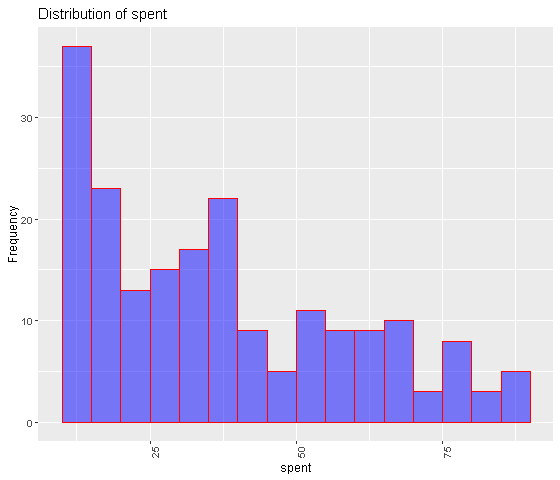

In [15]:

ggplot(data = facebookData) +
  geom_histogram(mapping = aes(x = spent), breaks=seq(10, 90, by=5), 
                 color="red", fill="blue", alpha=.5)+
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Distribution of spent", x="spent", y="Frequency")


`Important`: At the next `ggplot()` function we see a special ggplot variable '..density..' which is automatically calculated. There is not a really good documentation about that kind of variables :-( The most references are the [ggplot2 Cheat Sheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) and the [`stat()`](https://ggplot2.tidyverse.org/reference/stat.html)-function itself.

I have used the following special ggplot variables which are depending on the respective `geom`-function. What they mean is logical:

* **..count..** or in modern style 'stat(count)', e.g. in geom_bar(), geom_histogram()
* **..density..** or in modern style 'stat(density)', e.g. in geom_histogram()
* **..prop..** or in modern style 'stat(prop)', e.g. in geom_bar()



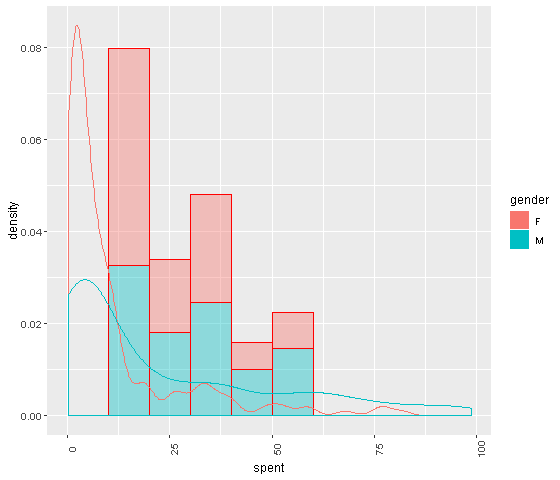

In [16]:
ggplot(data = facebookData) +
  geom_histogram(mapping = aes(x = spent, y =..density.., fill=gender), 
                 color="red", breaks=seq(10, 60, 10), alpha=.4)+ 
  geom_density(mapping=aes(x=spent, color=gender))+
  theme(axis.text.x = element_text(angle = 90))

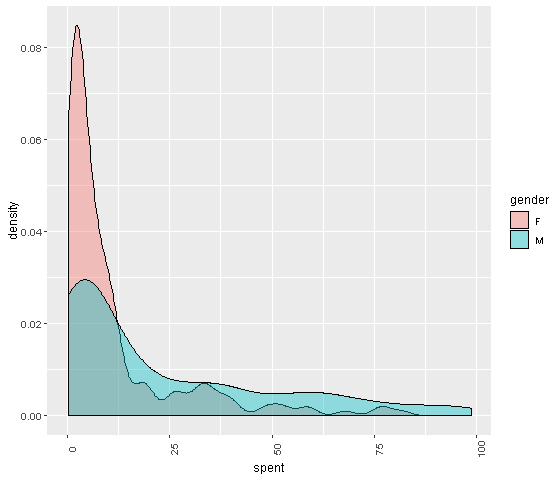

In [17]:
ggplot(data = facebookData) +
  geom_density(mapping=aes(x=spent, fill=gender), alpha=.4)+
  theme(axis.text.x = element_text(angle = 90))


## Calculate frequencies of categorical variables

We use [`table(x)`](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/table) to calculate the frequencies or create the contingency table of the counts at each combination of qualitative values of a variable.

We use [`prop.table(x, margin)`](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/prop.table) to calculate proportions of the table entries of 'x'. By default the argument 'margin' has the value NULL, then we get $x / sum(x)$ - the whole table sums to 1. If 'margin' = 1, then we can calculate the proportions across the rows - each row sums to 1. That's the **Conditional Probability $P(X=x | Y=y)$, given the row value as y**.  If 'margin' = 2, then we can calculate the proportions across the columns - each column sums to 1. That's the **Conditional Probability $P(X=x | Y=y)$, given the column value as y**. See the examples below for a better understanding.


#### Frequency and probability table of single categorical variable

In [18]:
regTab <- table(facebookData$age)
regTab

prop.table(regTab) 



30-34 35-39 40-44 45-49 
  191   131   103    81 


    30-34     35-39     40-44     45-49 
0.3774704 0.2588933 0.2035573 0.1600791 

#### Joint Frequency, Joint Probability and Conditional Probability
Joint Frequency of two variables:


In [19]:
(agegenderTab <- table(facebookData$age, facebookData$gender))

       
          F   M
  30-34  64 127
  35-39  36  95
  40-44  35  68
  45-49  54  27

Alternative method, which generates the same result:

In [20]:
xtabs(~ age+gender, data=facebookData)

       gender
age       F   M
  30-34  64 127
  35-39  36  95
  40-44  35  68
  45-49  54  27

**Joint Propability $P(X=x,Y=y)$** of two variables:


In [21]:
prop.table(agegenderTab)

       
                 F          M
  30-34 0.12648221 0.25098814
  35-39 0.07114625 0.18774704
  40-44 0.06916996 0.13438735
  45-49 0.10671937 0.05335968

The **Conditional Probability $P(X=x | Y=y)$, given the row value** can be calculated as shown below. For example, the probability, that somebody in the age 40-44 is a male person is

$$P(gender="M" \, | \, age = "40-44") =0.66$ \approx 66\% $$


In [22]:
prop.table(agegenderTab, 1)

       
                F         M
  30-34 0.3350785 0.6649215
  35-39 0.2748092 0.7251908
  40-44 0.3398058 0.6601942
  45-49 0.6666667 0.3333333

The **Conditional Probability $P(Y=y|X=x)$, given the column value** can be calculated as shown below. For example, the probability, that somebody is a male person and has a age range from 40-44 is 

$$P(age = "40-44"  \, | \, gender="M" ) =0.2145 \approx 21.45\% $$


In [23]:
prop.table(agegenderTab, 2)

       
                F         M
  30-34 0.3386243 0.4006309
  35-39 0.1904762 0.2996845
  40-44 0.1851852 0.2145110
  45-49 0.2857143 0.0851735